<a href="https://colab.research.google.com/github/pavinduLakshan/Deep-Learning-Practice/blob/master/Heart_Disease_Prediction_with_Supervised_Learning_in_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction with Supervised Learning in Scikit-Learn

This project aims to develop a machine learning model in Scikit-learning, which can predict whether a person is a heart patient by looking at 
his/her medical data.

This project consists of the following steps.

1. Defining the problem
2. Preprocessing the data
3. Selecting a suitable machine learning algorithm
4. Improving the model performance
5. Evaluate the performance of the developed model
6. Save the model for future use

## 01. Defining the problem

To build a machine learning model that is able to predict whether a person is a heart patient or not, using his/her clinical data.

## 02. Preprocessing the data

The data for this project was taken from https://www.kaggle.com/ronitf/heart-disease-uci. You can access my copy of that data from https://drive.google.com/drive/folders/1poar0GV2fNJ9zOY-k1WEhy-FJOExRMB6?usp=sharing.

We use, 
* Numpy, Pandas and Matplotlib for data preprocessing and visualization and 
* Scikit-learning for building, training and evaluating the machine learning model

In [0]:
# importing necessary libraries for data preprocessing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This enables displaying the figures generated by matplotlib
%matplotlib inline

# importing necessary functions for building the machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# importing the tools for evaluating and improving the model performance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [0]:
# Extracting the data
df = pd.read_csv('drive/My Drive/Heart Disease Prediction/heart-disease.csv')

### 2.1 Exploring data

In [82]:
# Visualize the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
# Visualize the last few rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [0]:
# Get the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
# Get the statistical details of each column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
# Check if there are any missing values in the dataset.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 2.2 Preprocessing data

In [83]:
# Normalize the data so that training models will become efficient
scaler = MinMaxScaler()

data = df.values #returns a numpy array
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data,columns=df.columns, index=df.index)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [0]:
# Splitting the data into features(X) and target(Y) datasets
X = df.drop("target",axis=1)
y = df["target"]

In [0]:
# Splitting into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 03. Selecting a suitable machine learning algorithm

In [0]:
# Create a function to experiment with a set of machine learning algorithms
def train_and_test_models(models_dict, X_train, X_test, y_train, y_test):
  """
  Trains and evaluates a set of machine learning algorithms
  Returns a dictionary of model scores for each model 
  
  models_dict - dictionary of ML algorithms and its names 
  X_train     - Features data for training the model
  X_test      - Features data for testing the model 
  y_train     - Target data for training the model
  y_test      - Target data for testing the model
  """
  #  Define the random state
  np.random.seed(42)

  model_scores = {}

  for name,model in models_dict.items():
    model.fit(X_train,y_train)
    model_scores[name] = model.score(X_test,y_test)
  
  return model_scores

In [0]:
models = {
    "LogReg": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}

model_scores = train_and_test_models(models,X_train, X_test, y_train, y_test)

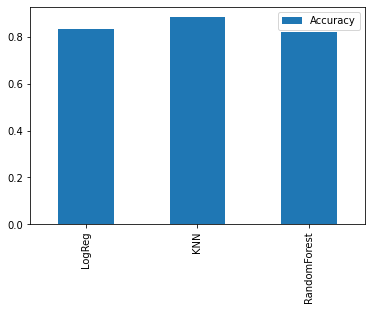

In [88]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

## 04. Improving the machine learning models 

#### 4.1 Improving K-Nearest Neighbor Modal

In [0]:
# Trying different values for the n_neighbors of KNN model
train_scores = []
test_scores = []

neighbor_values = range(1,21)

clf = KNeighborsClassifier()

for i in neighbor_values:
  clf.set_params(n_neighbors=i)
  clf.fit(X_train,y_train)
  train_scores.append(clf.score(X_train, y_train))
  test_scores.append(clf.score(X_test, y_test))

Maximum KNN score on the test data:  88.52%


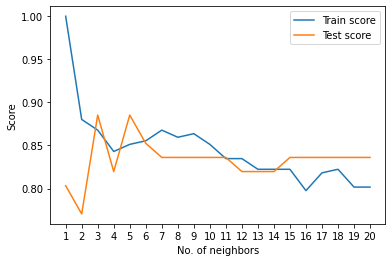

In [90]:
# Plot the results of the above test to clearly visualize
plt.plot(neighbor_values,train_scores,label="Train score")
plt.plot(neighbor_values,test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No. of neighbors")
plt.ylabel("Score")

plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100 : .2f}%")

#### 4.2 Improving Random Forest Classifier

In [100]:
# Set up random seed
np.random.seed(42)

rf_params = {
  "n_estimators": np.arange(10,1000,50),
  "max_depth": [None, 3, 5, 10],
  "min_samples_leaf": np.arange(1,20,2),
  "min_samples_split": np.arange(2,20,2)
}

rs_random_forest = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_params, n_iter=20,cv=5, verbose=True)

rs_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [101]:
rs_random_forest.best_params_

{'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 560}

In [103]:
rs_random_forest.score(X_test,y_test)

0.8360655737704918

#### 4.3 Improving Logistic Regression

In [94]:
lr_params = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=lr_params, n_iter=20, cv=5, verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [95]:
rs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [96]:
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [97]:
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=lr_params, cv=5, verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [98]:
gs_log_reg.score(X_test,y_test)

0.8032786885245902

**After these improvement efforts, KNN is still giving us the highest score on the test data. Therefore, let's pick KNN as the
most suitable machine learning algorithm for this task**

## 05. Evaluate the performance


In [0]:
# ROC score and AUC score

In [0]:
#Precision

In [0]:
#Recall

In [0]:
#F1 Score

In [0]:
#Confusion matrix

In [0]:
#Classification report

## 06. Save and reload the model/s

In [0]:
from pickle import pickle

